In [1]:
%cd /home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes
from source.kinetic_mechanisms import JaxKineticMechanisms as jm
from source.building_models import JaxKineticModelBuild as jkm
from source.load_sbml.sbml_load import *
from source.load_sbml.sbml_model import SBMLModel
import jax.numpy as jnp
import jax
import numpy as np
from source.utils import get_logger
logger = get_logger(__name__)
import diffrax 
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import sys
from source.simulated_dbtl.dbtl import DesignBuildTestLearnCycle
import xgboost as xgb
from xgboost import XGBClassifier,XGBRegressor
import sklearn.model_selection
import scipy


/home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes


In [15]:
# a simple sbml model
filepath = (
      "models/sbml_models/working_models/Messiha2013.xml")

model = SBMLModel(filepath)
# S=model._get_stoichiometric_matrix()
JaxKmodel = model.get_kinetic_model()

JaxKmodel = jax.jit(JaxKmodel)

ts = jnp.linspace(0,3,100)
# # #parameters are not yet defined
global_params = get_global_parameters(model.model)
params = {**model.local_params, **global_params}








15:17:15,679 - source.load_sbml.sbml_model - INFO - No internal inconsistencies found
15:17:15,680 - source.load_sbml.sbml_model - INFO - Model loaded.
15:17:15,680 - source.load_sbml.sbml_model - INFO -  number of species: 76
15:17:15,680 - source.load_sbml.sbml_model - INFO -  number of reactions: 34
15:17:15,681 - source.load_sbml.sbml_model - INFO -  number of global parameters: 10
15:17:15,681 - source.load_sbml.sbml_model - INFO -  number of constant boundary metabolites: 48
15:17:15,682 - source.load_sbml.sbml_model - INFO -  number of lambda function definitions: 0
15:17:15,682 - source.load_sbml.sbml_model - INFO -  number of assignment rules: 4
15:17:15,682 - source.load_sbml.sbml_model - INFO -  number of event rules: 0
Constant Boundary Specimen  ACE
Constant Boundary Specimen  EtOH
Constant Boundary Specimen  F26bP
Constant Boundary Specimen  GLCx
Constant Boundary Specimen  GLY
Constant Boundary Specimen  SUC
Constant Boundary Specimen  TRH
Constant Boundary Specimen  ADH

In [17]:
model.species_names

['ADP',
 'ATP',
 'AcAld',
 'BPG',
 'DHAP',
 'F16bP',
 'F6P',
 'G1P',
 'G3P',
 'G6P',
 'GAP',
 'GLC',
 'NAD',
 'P2G',
 'P3G',
 'PEP',
 'PYR',
 'T6P',
 'UDP',
 'UTP',
 'E4P',
 'G6L',
 'NADPH',
 'P6G',
 'R5P',
 'Ru5P',
 'S7P',
 'X5P']

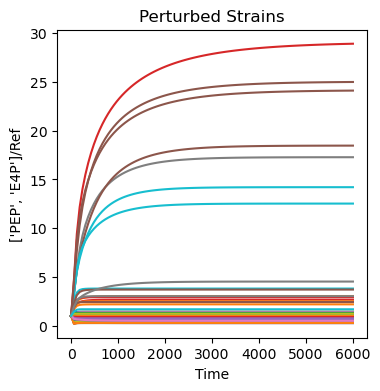

,lp.ADH.Kacald,lp.ENO.kcat_ENO1,lp.FBA.Kdhap,lp.HXK.kcat_HXK1,lp.PGK.kcat,lp.HXT.Vmax,lp.GND.Kp6g_GND1,Y_PEP,Y_E4P
cycle0_strain0,1.0,1.8,1.1,0.6,3.0,1.0,4.0,1.361529,0.915972
cycle0_strain1,1.5,3.0,2.7,1.0,1.0,1.0,3.0,0.976766,0.953636
cycle0_strain2,0.7,3.0,1.0,1.0,2.0,1.0,3.0,1.293233,0.930287
cycle0_strain3,2.5,1.0,1.0,1.0,5.0,2.0,1.0,0.452538,17.537713
cycle0_strain4,1.0,3.0,1.0,1.0,6.0,1.0,1.0,1.295523,0.877682
cycle0_strain5,1.0,1.2,1.6,3.6,1.0,1.0,2.0,0.746450,2.473590
cycle0_strain6,2.0,1.0,1.3,0.6,1.0,1.5,2.0,0.625827,2.939286
cycle0_strain7,2.0,1.5,1.0,2.6,1.0,2.0,1.0,0.237863,19.329318
cycle0_strain8,1.7,1.2,1.3,1.1,2.0,1.0,1.0,1.089623,1.100333
cycle0_strain9,3.5,1.0,1.0,2.0,1.0,0.5,6.0,1.143997,0.398472


In [29]:


ts=jnp.linspace(0,6000,100)
            
## one experimental cycle
dbtl_cycle=DesignBuildTestLearnCycle(model=model,
                          parameters=params,
                          initial_conditions=model.y0,
                          timespan=ts,
                          target=['PEP','E4P'])
parameter_target_names=['lp.pgi.Kf6p','lp.hxk.Vmax','lp.tpp.Vmax','lp.hxk.Kg6p']
parameter_target_names=['lp.ADH.Kacald','lp.ENO.kcat_ENO1','lp.FBA.Kdhap','lp.HXK.kcat_HXK1','lp.PGK.kcat','lp.HXT.Vmax','lp.GND.Kp6g_GND1']


parameter_perturbation_value=[[0.2,0.5,1,1.5,2],
                              [1.2,1.5,1.8],
                              [1.1,1.6,1.3],
                              [0.6,1.1,2,3],
                              [1,2,3],
                              [0.5,1,1.5],
                              [2,3,4]]
dbtl_cycle.DESIGN_establish_library_elements(parameter_target_names,
                                               parameter_perturbation_value)
dbtl_cycle.DESIGN_assign_probabilities()
strain_designs=dbtl_cycle.DESIGN_generate_strains(elements=6,samples=40,replacement=False)
values=dbtl_cycle.BUILD_simulate_strains(strain_designs,plot=True)
noised_values=dbtl_cycle.TEST_add_noise(values,0.1,type='heteroschedastic')
data=dbtl_cycle.TEST_format_dataset(strain_designs=strain_designs,
                               production_values=noised_values,
                               reference_parameters=dbtl_cycle.parameters)



data





In [ ]:
xgbparameters={'tree_method': 'auto','reg_lambda':1,'max_depth':2,"disable_default_eval_metric":0}
alternative_params={'num_boost_round':10,'early_stopping_rounds':40}
bst,r2_scores=dbtl_cycle.LEARN_train_model(data=data,
                                           target="t6p",
                                           model_type="XGBoost",
                                           args=(xgbparameters,alternative_params),test_size=0.20)


dbtl_cycle.LEARN_validate_model(samples=12,
                     elements=12,
                     target='t6p'
                     )

In [ ]:

fig,ax=plt.subplots(figsize=(3,3))
ax.scatter(validation_values['t6p'],y_predicted)
ax.plot([0, 1], [0, 1], transform=ax.transAxes,linestyle='--',c='black')
ax.set_title("R2 validation set")
ax.set_xlabel("True (simulated values)")
ax.set_xlabel("Predicted values)")

In [19]:
# def train_model(params,train_x,train_y):
#     if params['ML_model']=="GradientBoostingRegressor":
#         #random forest 
#         regr_gbr = BayesSearchCV(
#         GradientBoostingRegressor(),
#         {
#             "min_samples_split":(2,3,4,5,6,7,8),
#             "min_samples_leaf":(2,3,4,5,6,7,8),
#             "max_depth": (1,2,3,4,5,7,8),
#             "learning_rate":(0.00001,0.0001,0.001,0.01,0.1,0.2,0.3),
#         },
#         n_iter=40,
#         cv=5)
#         regr_gbr.fit(train_x,train_y)
#     return regr_gbr

train_X=data[parameter_target_names]



            



    # dtrain=xgb.DMatrix(train_X,label=train_Y.to_list())
    # parameters={'tree_method': 'auto','reg_lambda':1,'max_depth':2,"disable_default_eval_metric":0}




In [76]:
train_X=data[parameter_target_names]
train_Y=data['Y_t6p']



dtrain=xgb.DMatrix(train_X,label=train_Y.to_list())
parameters={'tree_method': 'auto','reg_lambda':1,'max_depth':2,"disable_default_eval_metric":0}
bst=xgb.train(dtrain=dtrain,params=parameters)

#generate dataset
strain_designs_validation=dbtl_cycle.DESIGN_generate_strains(elements=6,samples=50,replacement=False)
values_validation=dbtl_cycle.BUILD_simulate_strains(strain_designs_validation,plot=False)
# noised_values_validation=dbtl_cycle.TEST_add_noise(values,0.04,type='heteroschedastic')
data_validation=dbtl_cycle.TEST_format_dataset(strain_designs=strain_designs_validation,
                               production_values=values_validation,
                               reference_parameters=dbtl_cycle.parameters)


# bst.predict()

validation_set=xgb.DMatrix(data_validation[parameter_target_names])
y_predicted=bst.predict(validation_set)


In [77]:
# fig,ax=plt.subplots(figsize=(4,4))
# plt.scatter(values_validation['t6p'],y_predicted)




In [ ]:
# plt.hist(np.random.normal(1.5,scale=0.1,size=1000))
# plt.hist(np.random.normal(1,scale=0.1,size=1000))


plt.scatter(values['g6p'],np.random.normal(values['g6p'],np.array(values['g6p'])*0.1))

In [ ]:
plt.hist(np.random.normal(1.5,scale=1.5*0.1,size=1000))

plt.hist(np.random.normal(1,scale=1*0.1,size=1000))
plt.hist(np.random.normal(2,scale=2*0.1,size=1000))
plt.hist(np.random.normal(3,scale=3*0.1,size=1000))

In [ ]:
# the library will look like  
# Gene A p1
# Gene A p2
parameter_target_names=['lp.pgi.Kf6p','lp.hxk.Vmax','lp.tpp.Vmax']
parameter_perturbation_value=[[0.5,1,1.5],[1.2,1.5,1.8],[2,4,6]]
parameter_perturbation_occurence=[[1,1,1],[1,1,1],[1,1,1]]
# pd.DataFrame((itertools.product(parameter_target_names,parameter_promoter_values)))

# Use itertools.product to create the combinations
combinations = itertools.product(parameter_target_names, *parameter_perturbation_value)

flattened_combinations = [
    (name, value, occurrence)
    for name, values, occurrences in zip(parameter_target_names, parameter_perturbation_value, parameter_perturbation_occurence)
    for value, occurrence in zip(values, occurrences)
]

elementary_actions = pd.DataFrame(flattened_combinations, columns=['parameter_target', 'parameter_perturbation','occurence'])
elementary_actions['occurence']=elementary_actions['occurence']/elementary_actions['occurence'].sum()




In [ ]:
def equal_sampling_scenario(enz_names, perturb_range, N):
    """
    This function generates a list of designs for a scenario where each enzyme in a set of enzymes 
    has an equal chance of being perturbed within a certain range.
    
    :param enz_names: a list of strings representing enzyme names
    :param perturb_range: a list of tuples representing the perturbation range for each enzyme. 
    Each tuple contains two floats representing the minimum and maximum perturbation values.
    :param N: an integer representing the number of designs to generate
    
    :return: a list of dictionaries where each dictionary represents a design. Each dictionary has keys 
    that correspond to enzyme names and values that correspond to the perturbation value for that enzyme. 
    Additionally, the function returns a list of lists where each inner list represents a design and contains
    perturbation values for each enzyme.
    """
    library_choices=dict(zip(enz_names,perturb_range))# create a dictionary that maps each enzyme to its perturbation range
    cart=[] # create an empty list to hold the perturbation values for each design
    designs_list=[]
    for i in range(N):# loop N times to generate N designs
        design=[]
        for j in enz_names:
        
            x=np.random.choice(library_choices[j])# randomly select a perturbation value for the enzyme
            design.append(x)
        cart.append(design)
    for i in range(len(cart)):
        design=dict(zip(enz_names,cart[i]))# create a dictionary that maps enzyme names to perturbation values for the design
        designs_list.append(design)
    return designs_list,cart  # return the list of design dictionaries and the list of design perturbation values